In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import urllib
import requests
import pymongo
from bs4 import BeautifulSoup as bs1
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk import FreqDist
import seaborn as sns
from textblob import TextBlob, Word, Blobber
from nltk.stem import PorterStemmer
st = PorterStemmer()
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(10.7,6.27)})
from PIL import Image
import numpy as np
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'white'})
from textblob import TextBlob, Word, Blobber

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
socialhouse=pd.read_excel('/content/drive/MyDrive/datasets/socialhouse.xlsx', index_col=0)

In [ ]:
socialhouse.head()

,Date,Review,Store,source,review1
0,6/8/2021,Girls night out: The best Sangria ever. I lov...,social_house,yelp,girls night best sangria ever loved much two g...
1,6/18/2021,"This place is great on service. However, the $...",social_house,yelp,place great service however 14 spent wings hor...
2,5/18/2020,Awesome place for brunch!! 2 for 1 mimosas at ...,social_house,yelp,awesome place brunch 2 1 mimosas great deal da...
3,11/22/2019,A group of friends and I were looking for some...,social_house,yelp,group friends looking something drink ramen ch...
4,8/20/2019,I feel like this place does not know if it wan...,social_house,yelp,feel like place know wants straight bar pub ar...


In [ ]:
socialhouse['review_len'] = socialhouse['Review'].astype(str).apply(len)
socialhouse['word_count'] = socialhouse['Review'].apply(lambda x: len(str(x).split()))

In [ ]:
my_stop_words = set(stopwords.words('english') + list(ENGLISH_STOP_WORDS) + ['super', 'duper', 'place', 'good', 'great', 'like', 'really', 'best', 'amazing', 'social', 'house', 'definitely', 'awesome', 'castaways'])

In [ ]:
mask=np.array(Image.open('/content/drive/MyDrive/beer2.PNG'))

In [ ]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [ ]:
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))

In [ ]:
font_path='/content/drive/MyDrive/QuickPencil-Regular.ttf'

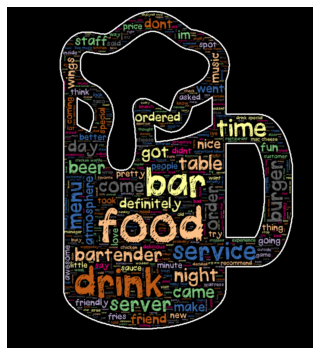

In [ ]:
from wordcloud import WordCloud
# concatenate all the reviews into one single string 
full_text = ' '.join(socialhouse['review1'])
cloud_no_stopword = WordCloud(background_color='black', font_path=font_path, colormap='Accent_r', stopwords=my_stop_words, max_words=1000, mask=mask, contour_color='white', contour_width=3, max_font_size=150).generate(full_text)
plt.imshow(cloud_no_stopword, interpolation='bilinear')
plt.axis("off")
plt.show()
cloud_no_stopword.to_file('this.png')

In [ ]:
nltk.download('punkt')
word_tokens=word_tokenize(full_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
tokens = list()
for word in word_tokens:
    if word.isalpha() and word not in my_stop_words:
        tokens.append(word)

In [ ]:
token_dist = FreqDist(tokens)
dist = pd.DataFrame(token_dist.most_common(10),columns=['Word', 'Frequency'])

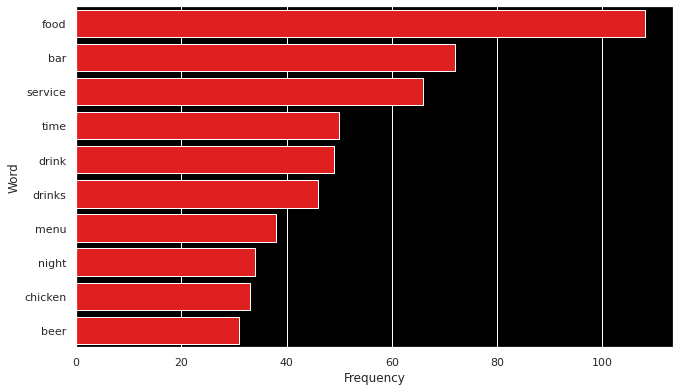

In [ ]:
sns.barplot(data=dist, y='Word', x='Frequency', color='red')

In [ ]:
porter = PorterStemmer()
stemmed_tokens =[porter.stem(word) for word in tokens]
stemmed_token_dist = FreqDist(stemmed_tokens)
stemmed_dist = pd.DataFrame(stemmed_token_dist.most_common(10),columns=['Word', 'Frequency'])

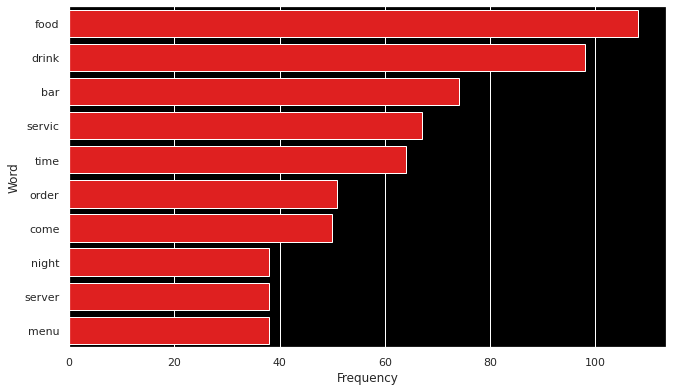

In [ ]:
sns.barplot(data=stemmed_dist, y='Word', x='Frequency', color='red')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words=my_stop_words, ngram_range=(2,2))
bigrams = vect.fit_transform(socialhouse['review1'])
bigram_df = pd.DataFrame(bigrams.toarray(), columns=vect.get_feature_names())
bigram_frequency = pd.DataFrame(bigram_df.sum(axis=0)).reset_index()
bigram_frequency.columns = ['bigram', 'frequency']
bigram_frequency = bigram_frequency.sort_values(by='frequency', ascending=False).head(20)

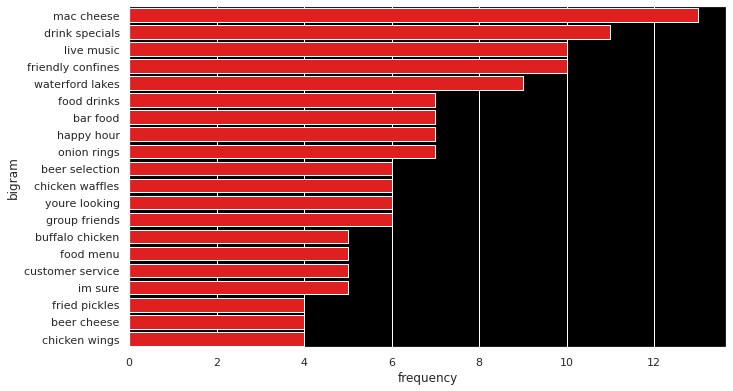

In [ ]:
sns.barplot(data=bigram_frequency, y='bigram', x='frequency', color='red')

In [ ]:
socialhouse['Date']=pd.to_datetime(socialhouse['Date'])
socialhouse=socialhouse.set_index('Date')

In [ ]:
socialhouse.head()

,Review,Store,source,review1,review_len,word_count
Date,,,,,,
2021-06-08,Girls night out: The best Sangria ever. I lov...,social_house,yelp,girls night best sangria ever loved much two g...,422,80
2021-06-18,"This place is great on service. However, the $...",social_house,yelp,place great service however 14 spent wings hor...,299,56
2020-05-18,Awesome place for brunch!! 2 for 1 mimosas at ...,social_house,yelp,awesome place brunch 2 1 mimosas great deal da...,103,20
2019-11-22,A group of friends and I were looking for some...,social_house,yelp,group friends looking something drink ramen ch...,568,107
2019-08-20,I feel like this place does not know if it wan...,social_house,yelp,feel like place know wants straight bar pub ar...,1838,352


In [ ]:
from textblob import TextBlob, Word, Blobber
socialhouse['polarity'] = socialhouse['review1'].map(lambda text: TextBlob(text).sentiment.polarity)

In [ ]:
socialhouse.head()

,Review,Store,source,review1,review_len,word_count,polarity
Date,,,,,,,
2021-06-08,Girls night out: The best Sangria ever. I lov...,social_house,yelp,girls night best sangria ever loved much two g...,422,80,0.293939
2021-06-18,"This place is great on service. However, the $...",social_house,yelp,place great service however 14 spent wings hor...,299,56,0.052381
2020-05-18,Awesome place for brunch!! 2 for 1 mimosas at ...,social_house,yelp,awesome place brunch 2 1 mimosas great deal da...,103,20,0.933333
2019-11-22,A group of friends and I were looking for some...,social_house,yelp,group friends looking something drink ramen ch...,568,107,0.313889
2019-08-20,I feel like this place does not know if it wan...,social_house,yelp,feel like place know wants straight bar pub ar...,1838,352,0.121412


In [ ]:
socialhouse['polaritybin']=pd.cut(socialhouse.polarity, bins=[-.5,.10,.20,.40, .50, 1], labels=['very_negative', 'negative','neutral', 'positive', 'very_positive'])

In [ ]:
socialhouse['polaritybin'].value_counts().sort_index()

very_negative    32
negative         24
neutral          42
positive         23
very_positive    21
Name: polaritybin, dtype: int64

In [ ]:
n=socialhouse[(socialhouse.polaritybin=='very_negative')]
p=socialhouse[(socialhouse.polaritybin=='very_positive') | (socialhouse.polaritybin=='positive')]

In [ ]:
n.head()

,Review,Store,source,review1,review_len,word_count,polarity,polaritybin
Date,,,,,,,,
2021-06-18,"This place is great on service. However, the $...",social_house,yelp,place great service however 14 spent wings hor...,299,56,0.052381,very_negative
2019-10-28,I'm taking away a star due to our last visit. ...,social_house,yelp,im taking away star due last visit buffalo chi...,415,76,-0.132143,very_negative
2019-03-26,"Hubby and I were craving tacos, but the Moe's ...",social_house,yelp,hubby craving tacos moes next door bad vibe la...,280,57,-0.017708,very_negative
2020-07-08,If I could give this place a negative 5-star r...,social_house,yelp,could give place negative 5star rating inappro...,1198,223,0.072778,very_negative
2021-04-20,"If I could rate this place a 0,.......I would....",social_house,yelp,could rate place 0i would horrible comes custo...,1092,203,0.066518,very_negative


In [ ]:
socialhouse.to_excel('soho2.xlsx')

In [ ]:
recent = socialhouse[socialhouse.index>='2019']
prior=socialhouse[socialhouse.index<'2019']

In [ ]:
recent.head()

,Review,Store,source,review1,review_len,word_count,polarity,polaritybin
Date,,,,,,,,
2021-06-08,Girls night out: The best Sangria ever. I lov...,social_house,yelp,girls night best sangria ever loved much two g...,422,80,0.293939,neutral
2021-06-18,"This place is great on service. However, the $...",social_house,yelp,place great service however 14 spent wings hor...,299,56,0.052381,very_negative
2020-05-18,Awesome place for brunch!! 2 for 1 mimosas at ...,social_house,yelp,awesome place brunch 2 1 mimosas great deal da...,103,20,0.933333,very_positive
2019-11-22,A group of friends and I were looking for some...,social_house,yelp,group friends looking something drink ramen ch...,568,107,0.313889,neutral
2019-08-20,I feel like this place does not know if it wan...,social_house,yelp,feel like place know wants straight bar pub ar...,1838,352,0.121412,negative


In [ ]:
n2=recent[(recent.polaritybin=='very_negative')|(recent.polaritybin=='negative')]
p2=recent[(recent.polaritybin=='positive')|(recent.polaritybin=='very_positive')]

In [ ]:
recentcounts=recent['polaritybin'].value_counts().sort_index()

In [ ]:
recentcounts

very_negative    17
negative          4
neutral          13
positive          9
very_positive     6
Name: polaritybin, dtype: int64

In [ ]:
recentcounts=pd.DataFrame(recentcounts).reset_index()
recentcounts.columns=['rating', 'frequency']

In [ ]:
recentcounts

,rating,frequency
0,very_negative,17
1,negative,4
2,neutral,13
3,positive,9
4,very_positive,6


In [ ]:
prior['polaritybin'].value_counts().sort_index()

very_negative    15
negative         20
neutral          29
positive         14
very_positive    15
Name: polaritybin, dtype: int64

In [ ]:
import numpy as np

In [ ]:
np.mean(prior['polarity'])

0.24679934025409514

In [ ]:
np.mean(recent['polarity'])

0.2057076363093488

In [ ]:
print(len(prior))
len((recent))

95


51

In [ ]:
n2.to_excel('read.xlsx')

In [ ]:
yearly = socialhouse['polarity'].resample('Y').mean()

Text(0.5, 1.0, 'Social House Review Polarity by Year')

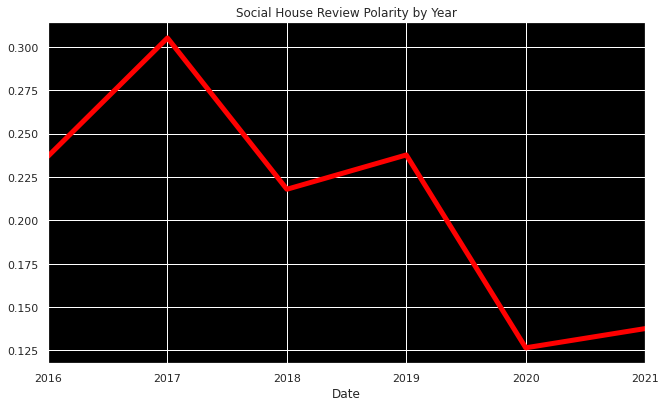

In [ ]:
yearly.plot(color='red', linewidth=5).set_title('Social House Review Polarity by Year')

In [ ]:
mask2=np.array(Image.open('/content/drive/MyDrive/bar_guy1.PNG'))
mask3=np.array(Image.open('/content/drive/MyDrive/toilet.PNG'))


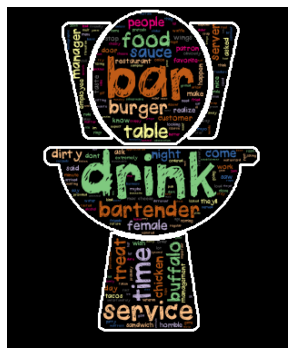

In [ ]:
from wordcloud import WordCloud
# concatenate all the reviews into one single string 
full_text = ' '.join(n2['review1'])
cloud_no_stopword = WordCloud(background_color='black', font_path=font_path, colormap='Accent_r', stopwords=my_stop_words, max_words=1000, mask=mask3, contour_color='white', contour_width=3, max_font_size=150).generate(full_text)
plt.imshow(cloud_no_stopword, interpolation='bilinear')
plt.axis('off')
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Text(0.5, 1.0, 'Most Common Words in Recent Negative Reviews')

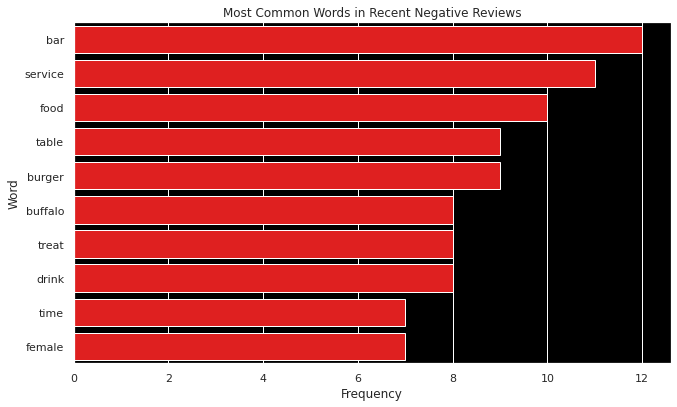

In [ ]:
nltk.download('punkt')
word_tokens=word_tokenize(full_text)
tokens = list()
for word in word_tokens:
    if word.isalpha() and word not in my_stop_words:
        tokens.append(word)
token_dist = FreqDist(tokens)
dist = pd.DataFrame(token_dist.most_common(10),columns=['Word', 'Frequency'])
sns.barplot(data=dist, y='Word', x='Frequency', color='red').set_title('Most Common Words in Recent Negative Reviews')


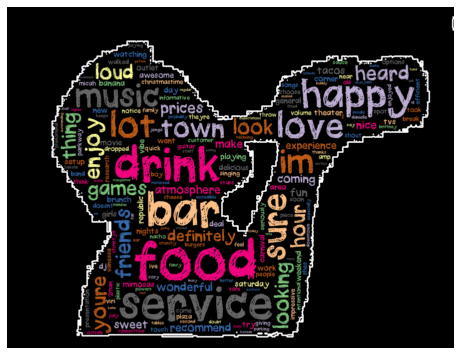

In [ ]:
from wordcloud import WordCloud
# concatenate all the reviews into one single string 
full_text = ' '.join(p2['review1'])
cloud_no_stopword = WordCloud(background_color='black', font_path=font_path, colormap='Accent_r', stopwords=my_stop_words, max_words=1000, mask=mask2, contour_color='white', contour_width=3, max_font_size=150).generate(full_text)
plt.imshow(cloud_no_stopword, interpolation='bilinear')
plt.axis('off')
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Text(0.5, 1.0, 'Most Common Words in Recent Positive Reviews')

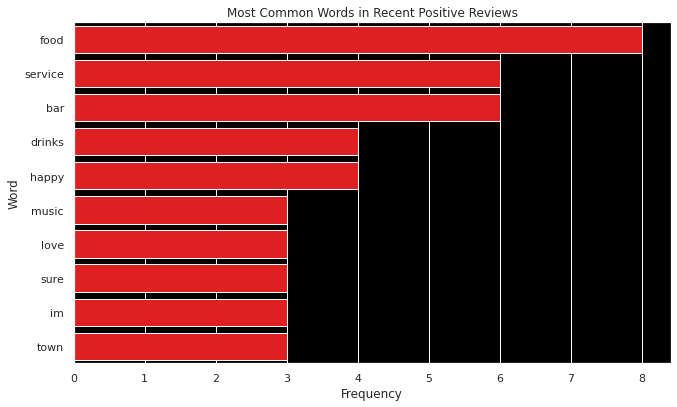

In [ ]:
nltk.download('punkt')
word_tokens=word_tokenize(full_text)
tokens = list()
for word in word_tokens:
    if word.isalpha() and word not in my_stop_words:
        tokens.append(word)
token_dist = FreqDist(tokens)
dist = pd.DataFrame(token_dist.most_common(10),columns=['Word', 'Frequency'])
sns.barplot(data=dist, y='Word', x='Frequency', color='red').set_title('Most Common Words in Recent Positive Reviews')


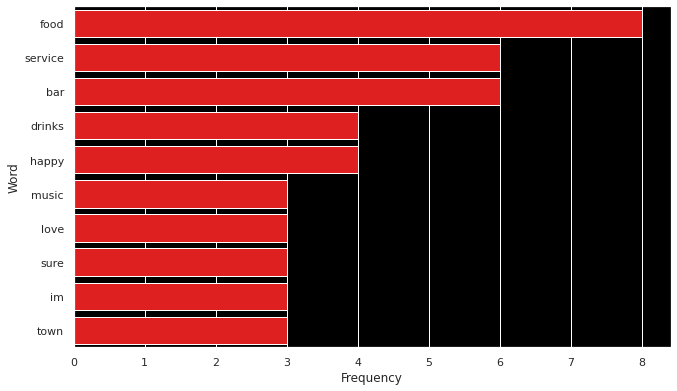

In [ ]:
porter = PorterStemmer()
stemmed_tokens =[porter.stem(word) for word in tokens]
stemmed_token_dist = FreqDist(stemmed_tokens)
stemmed_dist = pd.DataFrame(stemmed_token_dist.most_common(10),columns=['Word', 'Frequency'])
sns.barplot(data=dist, y='Word', x='Frequency', color='red')

Text(0.5, 1.0, 'Most Recent Negative Bigrams')

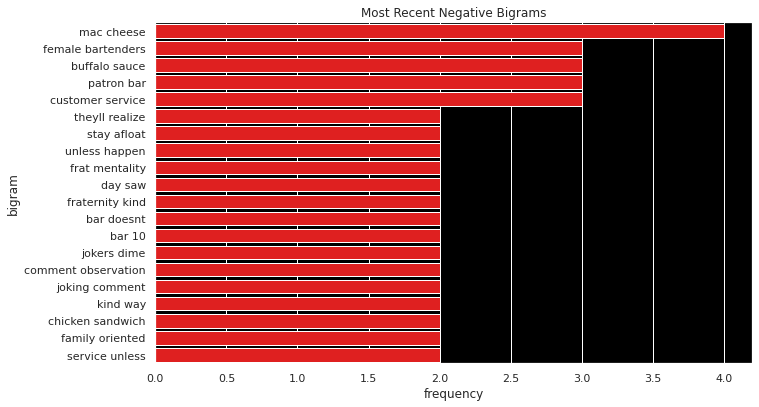

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words=my_stop_words, ngram_range=(2,2))
bigrams = vect.fit_transform(n2['review1'])
bigram_df = pd.DataFrame(bigrams.toarray(), columns=vect.get_feature_names())
bigram_frequency = pd.DataFrame(bigram_df.sum(axis=0)).reset_index()
bigram_frequency.columns = ['bigram', 'frequency']
bigram_frequency = bigram_frequency.sort_values(by='frequency', ascending=False).head(20)
sns.barplot(data=bigram_frequency, y='bigram', x='frequency', color='red').set_title('Most Recent Negative Bigrams')

In [ ]:
import datetime as dt

Text(0.5, 1.0, 'Polarity of Reviews from 2019-2021')

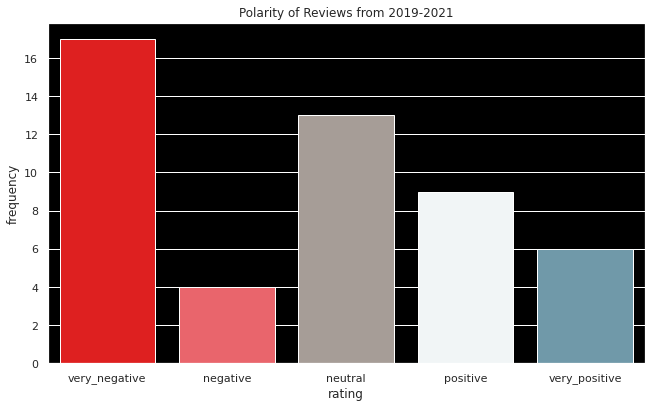

In [ ]:
pallet=['#FE0000FF', '#FF4F58FF', '#A89C94FF', '#F0F6F7FF', '#669DB3FF']
sns.barplot(data=recentcounts, x='rating', y='frequency', palette=pallet).set_title('Polarity of Reviews from 2019-2021')

Text(0, 0.5, 'Number of Reviews')

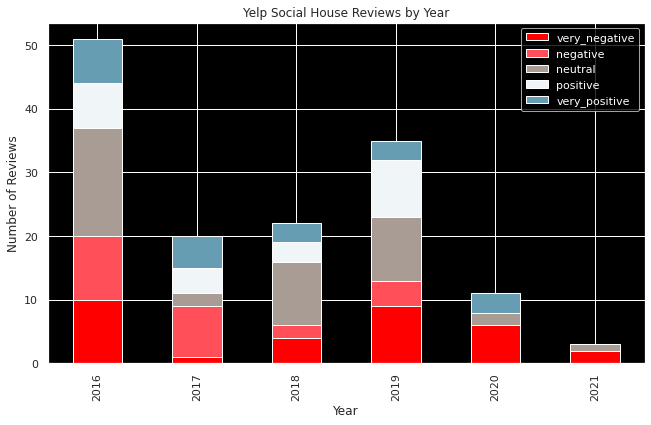

In [ ]:
pallet=['#FE0000FF', '#FF4F58FF', '#A89C94FF', '#F0F6F7FF', '#669DB3FF']
socialhouse.groupby([socialhouse.index.year, 'polaritybin']).size().unstack().plot(kind='bar', stacked=True, color=pallet ).set_title('Yelp Social House Reviews by Year')
legend=plt.legend()
plt.setp(legend.get_texts(), color='w')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')


In [ ]:
def plotword(word, dataframe):
  sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'white'})
  pallet=['#FE0000FF', '#FF4F58FF', '#A89C94FF', '#F0F6F7FF', '#669DB3FF']
  mylist=[]
  for i in dataframe['review1']:
    if word in i:
      x='yes'
      mylist.append(x)
    else:
      y='no'
      mylist.append(y)
  dataframe['mylist']=mylist
  totalservice=dataframe[dataframe['mylist']=='yes']
  recentserv=totalservice['polaritybin'].value_counts().sort_index()
  recentserv=pd.DataFrame(recentserv).reset_index()
  recentserv.columns=['rating', 'frequency']

  sns.barplot(data=recentserv, x='rating', y='frequency', palette=pallet).set_title("Polarity for Reviews Containing " + word.capitalize())
  del dataframe['mylist']

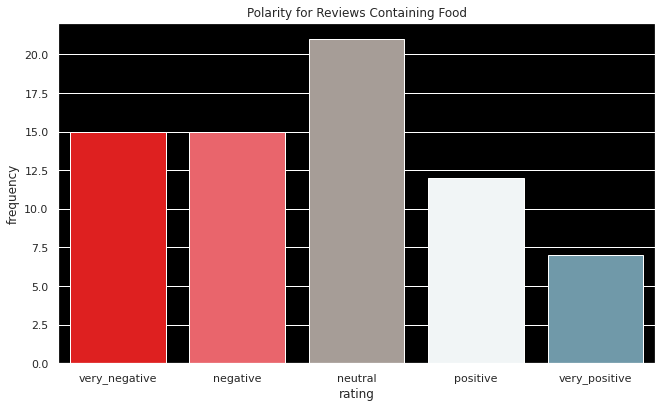

In [ ]:
plotword(word='food', dataframe=socialhouse)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


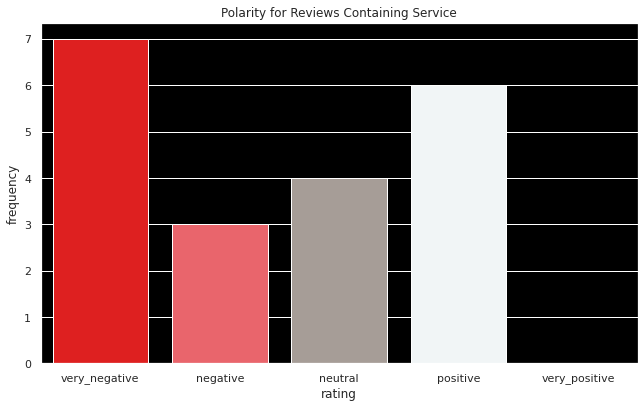

In [ ]:
plotword(word='service', dataframe=recent)

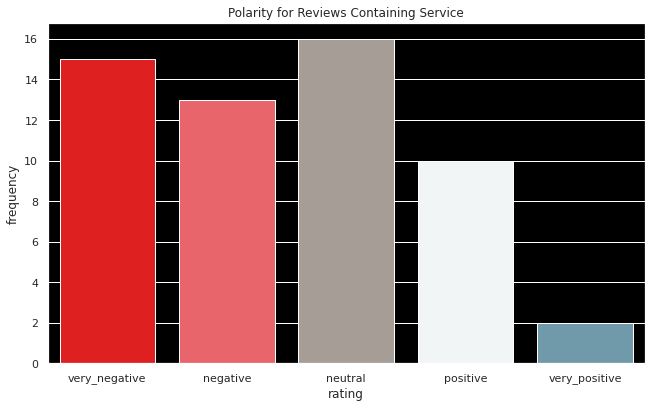

In [ ]:
plotword(word='service', dataframe=socialhouse)

Competitor comparison

In [ ]:
castaways=pd.read_excel('/content/drive/MyDrive/datasets/castaways.xlsx', index_col=0)

In [ ]:
castaways['review_len'] = castaways['Review'].astype(str).apply(len)
castaways['word_count'] = castaways['Review'].apply(lambda x: len(str(x).split()))

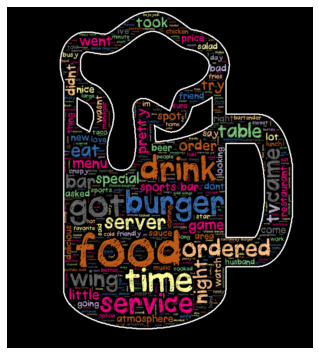

In [ ]:
from wordcloud import WordCloud
# concatenate all the reviews into one single string 
full_text = ' '.join(castaways['review1'])
cloud_no_stopword = WordCloud(background_color='black', font_path=font_path, colormap='Accent_r', stopwords=my_stop_words, max_words=1000, mask=mask, contour_color='white', contour_width=3, max_font_size=150).generate(full_text)
plt.imshow(cloud_no_stopword, interpolation='bilinear')
plt.axis("off")
plt.show()
cloud_no_stopword.to_file('this2.png')

In [ ]:
nltk.download('punkt')
word_tokens=word_tokenize(full_text)
tokens = list()
for word in word_tokens:
    if word.isalpha() and word not in my_stop_words:
        tokens.append(word)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
token_dist = FreqDist(tokens)
dist = pd.DataFrame(token_dist.most_common(10),columns=['Word', 'Frequency'])

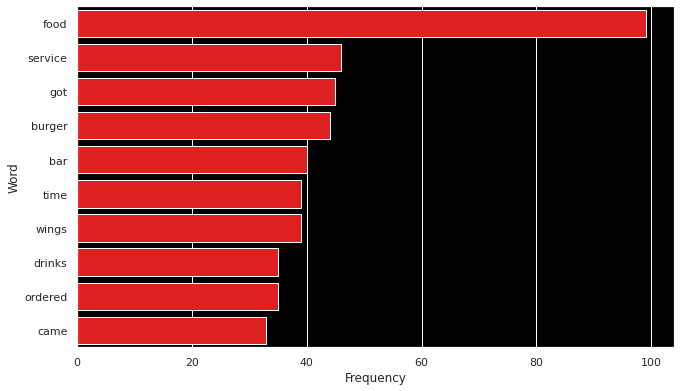

In [ ]:
sns.barplot(data=dist, y='Word', x='Frequency', color='red')

In [ ]:
porter = PorterStemmer()
stemmed_tokens =[porter.stem(word) for word in tokens]
stemmed_token_dist = FreqDist(stemmed_tokens)
stemmed_dist = pd.DataFrame(stemmed_token_dist.most_common(10),columns=['Word', 'Frequency'])

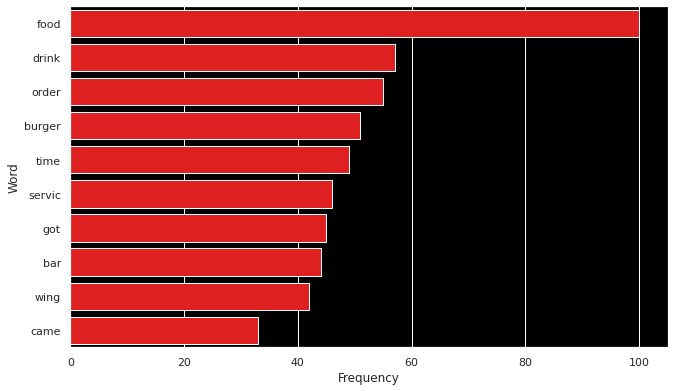

In [ ]:
sns.barplot(data=stemmed_dist, y='Word', x='Frequency', color='red')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words=my_stop_words, ngram_range=(2,2))
bigrams = vect.fit_transform(castaways['review1'])
bigram_df = pd.DataFrame(bigrams.toarray(), columns=vect.get_feature_names())
bigram_frequency = pd.DataFrame(bigram_df.sum(axis=0)).reset_index()
bigram_frequency.columns = ['bigram', 'frequency']
bigram_frequency = bigram_frequency.sort_values(by='frequency', ascending=False).head(20)

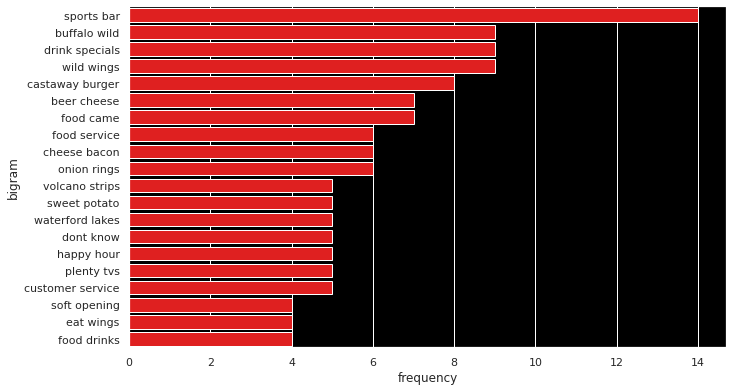

In [ ]:
sns.barplot(data=bigram_frequency, y='bigram', x='frequency', color='red')

In [ ]:
castaways['Date']=pd.to_datetime(castaways['Date'])
castaways=castaways.set_index('Date')

In [ ]:
from textblob import TextBlob, Word, Blobber
castaways['polarity'] = castaways['review1'].map(lambda text: TextBlob(text).sentiment.polarity)

In [ ]:
castaways['polaritybin']=pd.cut(castaways.polarity, bins=[-.5,.10,.20,.40, .50, 1], labels=['very_negative', 'negative','neutral', 'positive', 'very_positive'])

In [ ]:
castaways['polaritybin'].value_counts().sort_index()

very_negative    18
negative         17
neutral          42
positive         11
very_positive    23
Name: polaritybin, dtype: int64

In [ ]:
cn=castaways[(castaways.polaritybin=='very_negative')]
cp=castaways[(castaways.polaritybin=='very_positive') | (castaways.polaritybin=='positive')]

In [ ]:
recent = castaways[castaways.index>='2019']
prior=castaways[castaways.index<'2019']

In [ ]:
recentcounts=recent['polaritybin'].value_counts().sort_index()

In [ ]:
recentcounts

very_negative     8
negative          1
neutral          18
positive          5
very_positive     9
Name: polaritybin, dtype: int64

In [ ]:
recentcounts=pd.DataFrame(recentcounts).reset_index()
recentcounts.columns=['rating', 'frequency']

In [ ]:
prior['polaritybin'].value_counts().sort_index()

very_negative    10
negative         16
neutral          24
positive          6
very_positive    14
Name: polaritybin, dtype: int64

In [ ]:
np.mean(prior['polarity'])

0.3142523997292291

In [ ]:
np.mean(recent['polarity'])

0.2876474739290093

In [ ]:
yearly = castaways['polarity'].resample('Y').mean()

Text(0.5, 1.0, 'Castaways Review Polarity by Year')

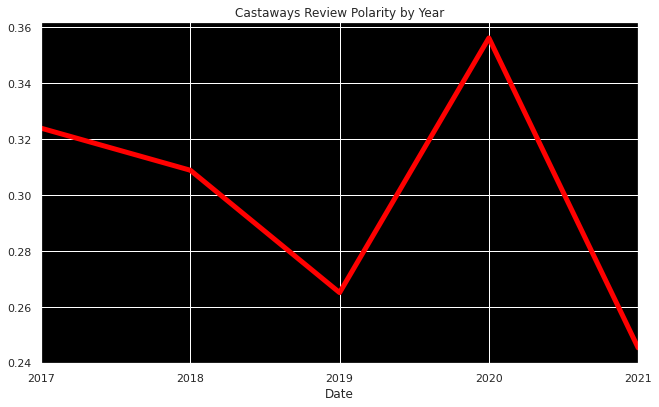

In [ ]:
yearly.plot(color='red', linewidth=5).set_title('Castaways Review Polarity by Year')

In [ ]:
from wordcloud import WordCloud
# concatenate all the reviews into one single string 
full_text = ' '.join(n2['review1'])
cloud_no_stopword = WordCloud(background_color='black', font_path=font_path, colormap='Accent_r', stopwords=my_stop_words, max_words=1000, mask=mask3, contour_color='white', contour_width=3, max_font_size=150).generate(full_text)
plt.imshow(cloud_no_stopword, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
cn2=recent[(recent.polaritybin=='very_negative')|(recent.polaritybin=='negative')]
cp2=recent[(recent.polaritybin=='positive')|(recent.polaritybin=='very_positive')]

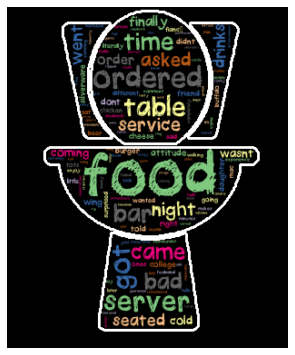

In [ ]:
from wordcloud import WordCloud
# concatenate all the reviews into one single string 
full_text = ' '.join(cn2['review1'])
cloud_no_stopword = WordCloud(background_color='black', font_path=font_path, colormap='Accent_r', stopwords=my_stop_words, max_words=1000, mask=mask3, contour_color='white', contour_width=3, max_font_size=150).generate(full_text)
plt.imshow(cloud_no_stopword, interpolation='bilinear')
plt.axis('off')
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Text(0.5, 1.0, 'Most Common Words in Recent Negative Reviews')

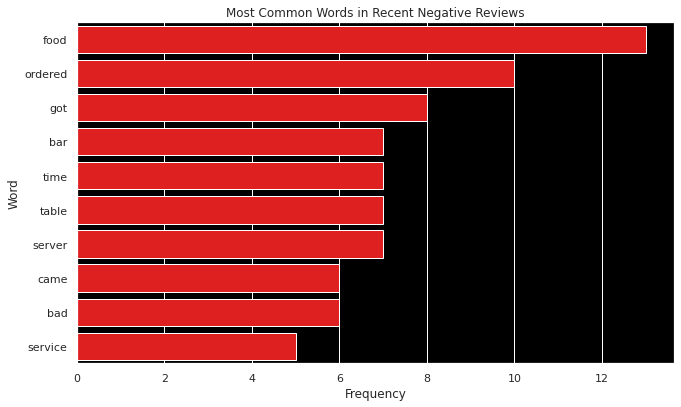

In [ ]:
nltk.download('punkt')
word_tokens=word_tokenize(full_text)
tokens = list()
for word in word_tokens:
    if word.isalpha() and word not in my_stop_words:
        tokens.append(word)
token_dist = FreqDist(tokens)
dist = pd.DataFrame(token_dist.most_common(10),columns=['Word', 'Frequency'])
sns.barplot(data=dist, y='Word', x='Frequency', color='red').set_title('Most Common Words in Recent Negative Reviews')

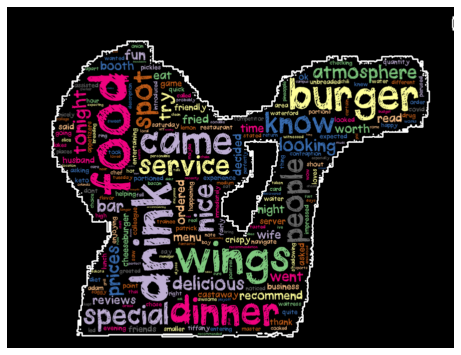

In [ ]:
from wordcloud import WordCloud
# concatenate all the reviews into one single string 
full_text = ' '.join(cp2['review1'])
cloud_no_stopword = WordCloud(background_color='black', font_path=font_path, colormap='Accent_r', stopwords=my_stop_words, max_words=1000, mask=mask2, contour_color='white', contour_width=3, max_font_size=150).generate(full_text)
plt.imshow(cloud_no_stopword, interpolation='bilinear')
plt.axis('off')
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Text(0.5, 1.0, 'Most Common Words in Recent Positive Reviews')

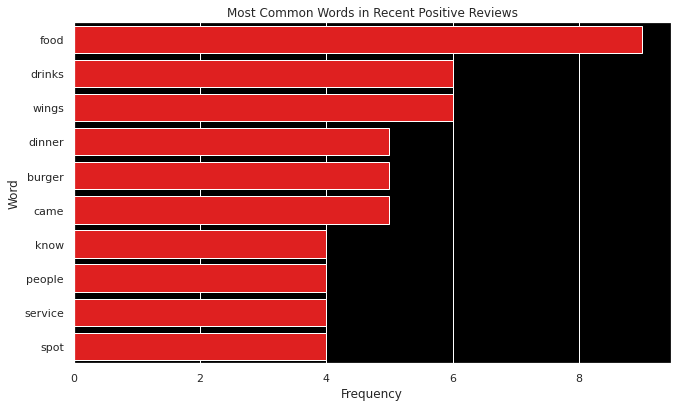

In [ ]:
nltk.download('punkt')
word_tokens=word_tokenize(full_text)
tokens = list()
for word in word_tokens:
    if word.isalpha() and word not in my_stop_words:
        tokens.append(word)
token_dist = FreqDist(tokens)
dist = pd.DataFrame(token_dist.most_common(10),columns=['Word', 'Frequency'])
sns.barplot(data=dist, y='Word', x='Frequency', color='red').set_title('Most Common Words in Recent Positive Reviews')


Text(0.5, 1.0, 'Most Recent Negative Bigrams')

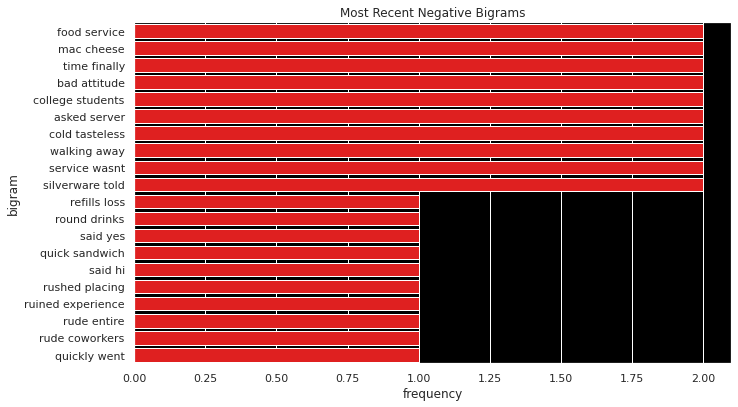

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words=my_stop_words, ngram_range=(2,2))
bigrams = vect.fit_transform(cn2['review1'])
bigram_df = pd.DataFrame(bigrams.toarray(), columns=vect.get_feature_names())
bigram_frequency = pd.DataFrame(bigram_df.sum(axis=0)).reset_index()
bigram_frequency.columns = ['bigram', 'frequency']
bigram_frequency = bigram_frequency.sort_values(by='frequency', ascending=False).head(20)
sns.barplot(data=bigram_frequency, y='bigram', x='frequency', color='red').set_title('Most Recent Negative Bigrams')

Text(0.5, 1.0, 'Castaways Polarity of Reviews from 2019-2021')

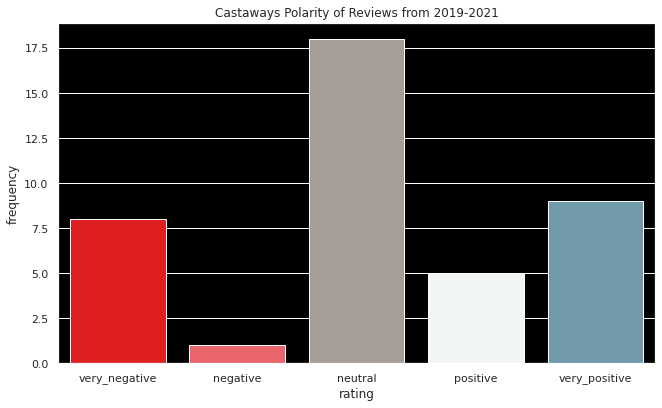

In [ ]:
pallet=['#FE0000FF', '#FF4F58FF', '#A89C94FF', '#F0F6F7FF', '#669DB3FF']
sns.barplot(data=recentcounts, x='rating', y='frequency', palette=pallet).set_title('Castaways Polarity of Reviews from 2019-2021')

Text(0, 0.5, 'Number of Reviews')

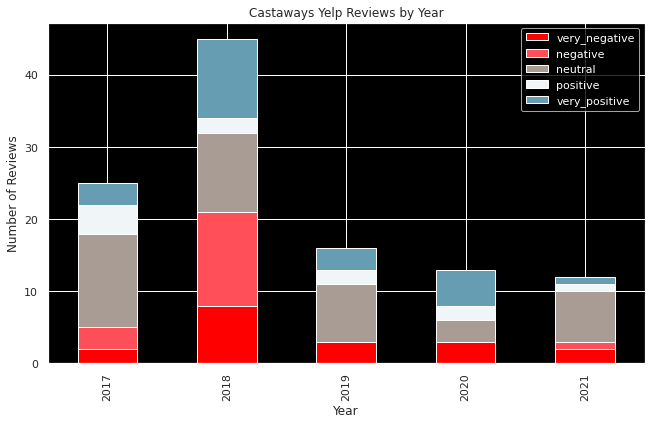

In [ ]:
pallet=['#FE0000FF', '#FF4F58FF', '#A89C94FF', '#F0F6F7FF', '#669DB3FF']
castaways.groupby([castaways.index.year, 'polaritybin']).size().unstack().plot(kind='bar', stacked=True, color=pallet ).set_title('Castaways Yelp Reviews by Year')
legend=plt.legend()
plt.setp(legend.get_texts(), color='w')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')

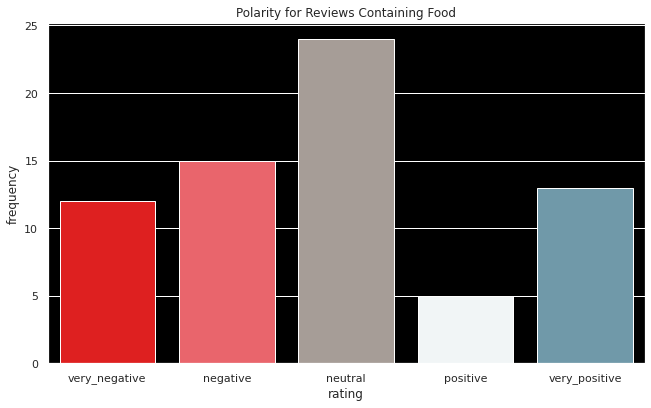

In [ ]:
plotword(word='food', dataframe=castaways)

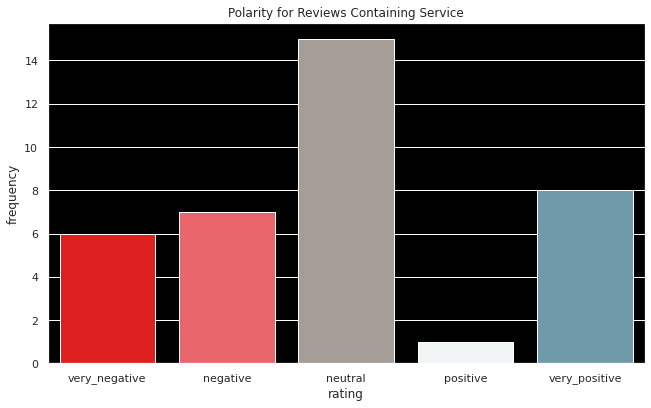

In [ ]:
plotword(word='service', dataframe=castaways)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


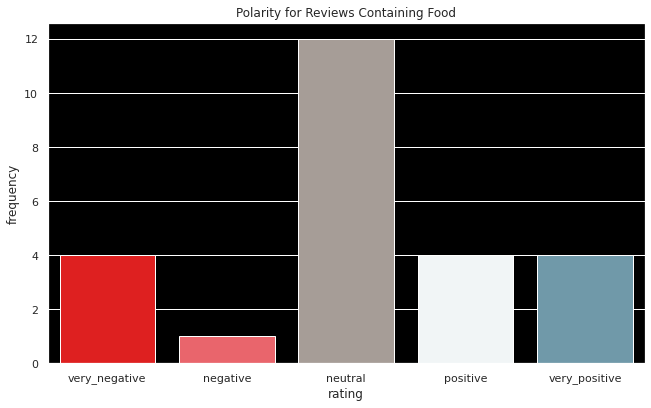

In [ ]:
plotword(word='food', dataframe=recent)

google analysis